This notebook implements logistic regression with two variables using a dataset from Andrew Ng's ML coursera course: Exercise 2. 

In [9]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = 'data/coursera_ml/ex2data1.txt'
ALPHA = 0.01  # regularization constant
CLASSIFICATION_THRESHOLD = 0.5

Read data from a file, and normalized the features.

In [4]:
data = np.array([ l.rstrip().split(',') for l in open(DATA_PATH)], dtype=np.float32)

def normalize(data):
    mean = np.mean(data, 0)
    std = np.std(data, 0)
    return (data - mean) /  std

train_features = data[:,:-1]
train_labels = data[:,-1].reshape(-1,1)  # yields column vector

scaled_train_features = normalize(train_features)

Construct model for logistic regression where $\Pr(y=1\;|\;x,w,b) = h_{w,b}(x) = \textrm{sigmoid}(x^{\top}w + b)$.

We use the regularized loss function: $-\frac{1}{M}\Sigma \bigl[ Y \log(h_{w,b}(x)) + (1-h_{w,b}(x))\log(1-\hat{Y}) \bigr] + \alpha \Sigma w^2$.  Where $\alpha$ is the regularization constant, and M is the number of training examples.

We classify an input as true when $\Pr(y=1\;|\;x,w,b) > 0.5$ and we assess the accuracy of our model as percentage of instances in which the model classification matches the labeled classification.

In [5]:
with tf.name_scope('model'):
    X = scaled_train_features
    #X = tf.placeholder(tf.float32, shape=(None, num_features))
    Y = train_labels
    #Y = tf.placeholder(tf.float32, shape=(None, 1))
    w = tf.Variable(tf.zeros([2,1]), name='weights')
    b = tf.Variable(tf.zeros([1]), name='bias')
    prediction = tf.sigmoid(tf.matmul(X, w) + b)

with tf.name_scope('training'):
    loss = ( -tf.reduce_mean(Y * tf.log(prediction) + 
                            (1-Y) * tf.log(1-prediction)) +
              tf.reduce_sum(tf.square(w)) * ALPHA)
    training_op = tf.train.AdamOptimizer().minimize(loss)

with tf.name_scope('eval'):
    classification = tf.cast(prediction > CLASSIFICATION_THRESHOLD, tf.float32)
    correct_classification = tf.equal(classification, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_classification, tf.float32))

In [29]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for step in xrange(5000):
    sess.run(training_op)
print 'After %d steps, we have a loss of %f and an accuracy of %f.' % (step, sess.run(loss), sess.run(accuracy))

After 4999 steps, we have a loss of 0.318137 and an accuracy of 0.890000.


Below we plot our data with the decision boundry: $X^\top w > 0$.

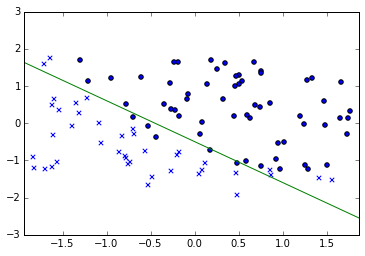

In [27]:
wt, bt = sess.run(w), sess.run(b)
min_x = min(scaled_train_features[:,0]) - 0.1
max_x = max(scaled_train_features[:,0]) + 0.1
x_true = [xi for i,xi in enumerate(scaled_train_features[:,0]) if train_labels[i]]
y_true = [yi for i,yi in enumerate(scaled_train_features[:,1]) if train_labels[i]]
x_false = [xi for i,xi in enumerate(scaled_train_features[:,0]) if not train_labels[i]]
y_false = [yi for i,yi in enumerate(scaled_train_features[:,1]) if not train_labels[i]]
plt.scatter(x_true, y_true, marker='o')
plt.scatter(x_false, y_false, marker='x')
x_db = np.linspace(min_x, max_x, 10)
y_db = -(wt[0] * x_db + bt) / wt[1]
plt.xlim((min_x,max_x))
plt.plot(x_db, y_db, 'g')